In [1]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_images(folder_path, image_size=(64, 64)):
    image_data = []

    # Iterate through each directory in the main folder
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Iterate through each file in the subdirectory
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    # If the file is an image file, load, resize, convert to array, and normalize
                    image = Image.open(file_path)
                    image = image.resize(image_size)  # Resize the image
                    image_array = np.array(image) / 255.0  # Convert to array and normalize
                    image_data.append(image_array)

    # Convert the list of arrays to a numpy array
    image_data = np.array(image_data)

    return image_data

folder_path = 'flowers/'
images = preprocess_images(folder_path)

In [2]:
# Define the ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [3]:
# Create a generator for the images in your folder
image_generator = train_datagen.flow_from_directory(
    folder_path,  # directory containing your images
    target_size=(64, 64),  # resize images to 64x64
    batch_size=32,
    class_mode='binary'  # assuming binary classification
)


Found 4317 images belonging to 5 classes.


In [4]:
# Generate some augmented images along with their labels
augmented_images, labels = [], []
for _ in range(5):  # Generate 5 augmented batches
    batch = next(image_generator)
    augmented_images.extend(batch[0])
    labels.extend(batch[1])

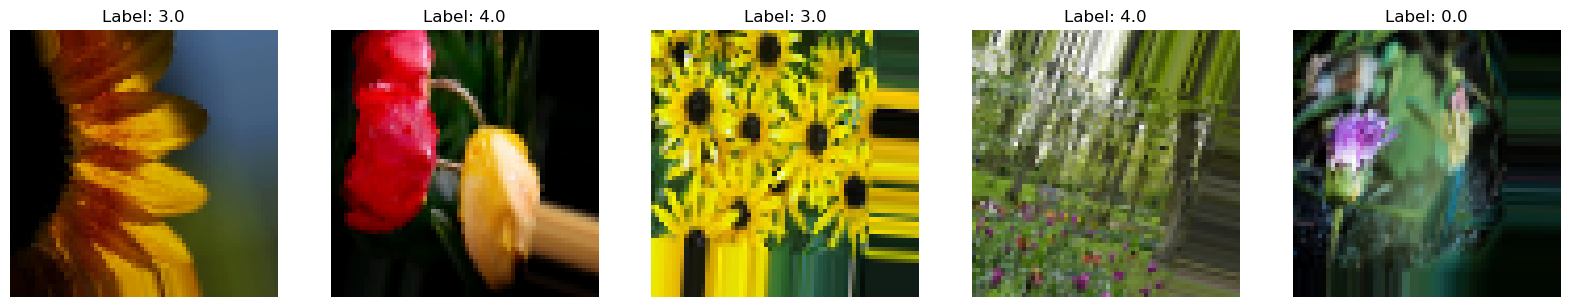

In [5]:
import matplotlib.pyplot as plt
# Display the augmented images along with their labels
num_images_to_display = min(5, len(augmented_images))  # Ensure we don't try to display more images than available
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
for i, (image, label) in enumerate(zip(augmented_images[:num_images_to_display], labels[:num_images_to_display])):
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')  # Assuming binary classification (0 or 1)

plt.show()

In [6]:
# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Iterate through each subdirectory (each class)
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Count the number of images in the subdirectory
        num_images = len(os.listdir(subdir_path))
        class_counts[subdir] = num_images


In [7]:
# Display the total number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'daisy' has 764 images.
Class 'dandelion' has 1052 images.
Class 'rose' has 784 images.
Class 'sunflower' has 733 images.
Class 'tulip' has 984 images.


In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [9]:
image_size = 256
batch_size = 32
channels = 3
epochs=15

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "flowers/",
    shuffle=True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 4317 files belonging to 5 classes.


In [11]:
class_names = dataset.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
# every element in the dataset is actaully a batch of 32 images 
len(dataset)

135

In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

[[[1.42000000e+02 1.05000000e+02 9.60000000e+01]
  [1.42000000e+02 1.04093750e+02 9.50937500e+01]
  [1.35250000e+02 9.72500000e+01 8.65625000e+01]
  ...
  [4.62187500e+01 5.06875000e+01 5.04375000e+01]
  [1.49062500e+01 2.17187500e+01 1.57500000e+01]
  [1.40000000e+01 1.90000000e+01 2.30000000e+01]]

 [[1.48042969e+02 1.06294922e+02 9.94531250e+01]
  [1.48434143e+02 1.04997498e+02 9.81557007e+01]
  [1.44273987e+02 9.99342651e+01 9.21333618e+01]
  ...
  [5.91814575e+01 6.15594482e+01 5.84498291e+01]
  [2.08278198e+01 2.59137573e+01 1.56286011e+01]
  [1.87480469e+01 2.20214844e+01 2.17050781e+01]]

 [[1.56000000e+02 1.07841797e+02 1.04000000e+02]
  [1.56954041e+02 1.05981506e+02 1.02235291e+02]
  [1.56386963e+02 1.03435791e+02 9.96104736e+01]
  ...
  [7.69371948e+01 7.63150024e+01 6.90543823e+01]
  [2.98164673e+01 3.24855957e+01 1.60372925e+01]
  [2.54746094e+01 2.64746094e+01 1.99472656e+01]]

 ...

 [[1.05253906e+01 1.35253906e+01 6.63085938e+00]
  [9.71826172e+00 1.27182617e+01 5.7281

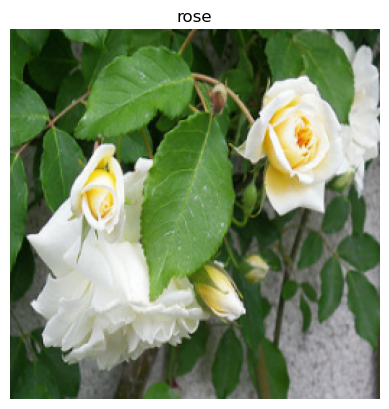

In [14]:
import matplotlib.pyplot as plt

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    plt.show()

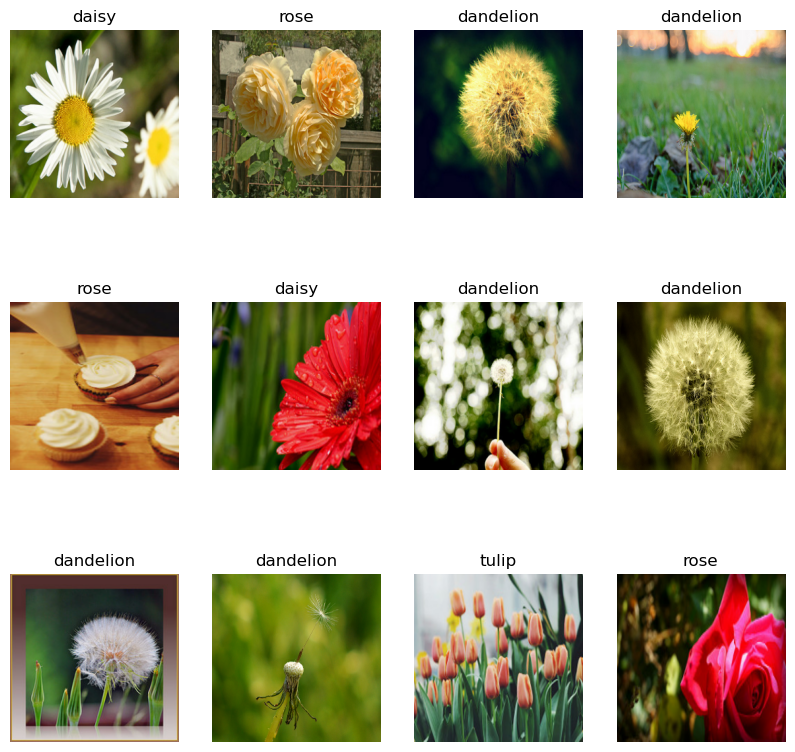

In [15]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [16]:
train_size=0.8
len(dataset)*train_size

108.0

In [17]:
train_ds=dataset.take(142)
len(train_ds)

135

In [18]:
test_ds = dataset.skip(142)
len(test_ds)

0

In [19]:
val_size=0.1
len(dataset)*val_size

13.5

In [20]:
val_ds=test_ds.take(17)
len(val_ds)

0

In [21]:
test_ds=test_ds.skip(17)
len(test_ds)

0

In [22]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split *ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

108

In [25]:
len(val_ds)

13

In [26]:
len(test_ds)

14

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
from tensorflow.keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [50]:
# building convolutional neural network
input_shape = (batch_size, image_size, image_size, channels)
n_classes=5
model = models.Sequential ([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16,33,activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
 model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']
 )

In [53]:
history = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
  8/108 ━━━━━━━━━━━━━━━━━━━━ 3:01 2s/step - accuracy: 0.1641 - loss: 1.6073

KeyboardInterrupt: 

In [66]:
scores = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9775 - loss: 0.0848


In [67]:
scores

[0.0575258731842041, 0.985049843788147]

In [68]:
history

In [69]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 142}

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [71]:
history.history['accuracy']

[0.5985015630722046,
 0.8329660892486572,
 0.9360951781272888,
 0.956148087978363,
 0.9704715609550476,
 0.9801674485206604,
 0.9795063734054565,
 0.9863376021385193,
 0.9742177128791809,
 0.9905244708061218,
 0.9828118085861206,
 0.9874393939971924,
 0.9878801107406616,
 0.9914059042930603,
 0.9896430373191833,
 0.9911855459213257,
 0.9936095476150513,
 0.9922873377799988,
 0.9878801107406616,
 0.9958131313323975,
 0.9973556399345398,
 0.9942706227302551,
 0.9892023205757141,
 0.9955927729606628,
 0.9958131313323975,
 0.9905244708061218,
 0.9995592832565308,
 0.9938299059867859,
 0.9856765270233154,
 0.9881004691123962,
 0.9832525253295898,
 0.9973556399345398,
 0.9984574913978577,
 0.9958131313323975,
 0.987659752368927,
 0.998237133026123,
 1.0,
 0.9973556399345398,
 0.9940502643585205,
 0.9984574913978577,
 0.9960334897041321,
 0.9988982081413269,
 0.998237133026123,
 0.9969149231910706,
 0.9969149231910706,
 0.9986778497695923,
 0.9951520562171936,
 0.992728054523468,
 0.992066979

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

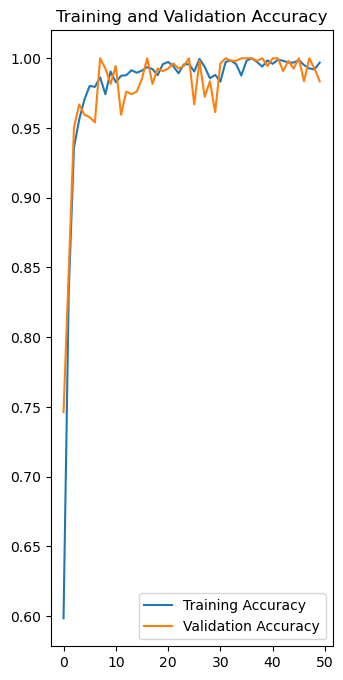

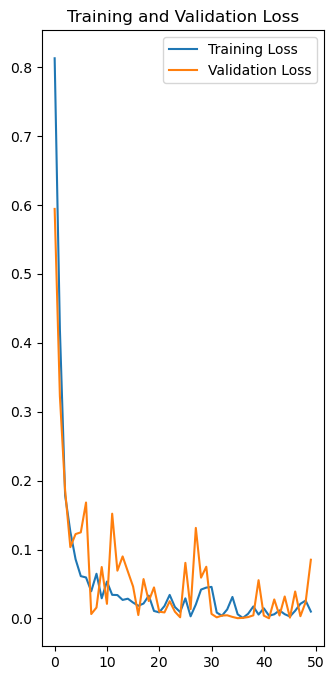

In [73]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
import numpy as np
np.argmax([2.2861544e-09, 2.1310309e-14, 1.0000000e+00])

2

first image to predict
actual label: Potato_EarlyBlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
predicted label: Potato_EarlyBlight


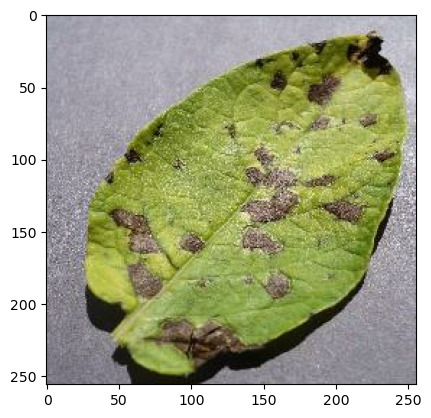

In [86]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])] )

In [87]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


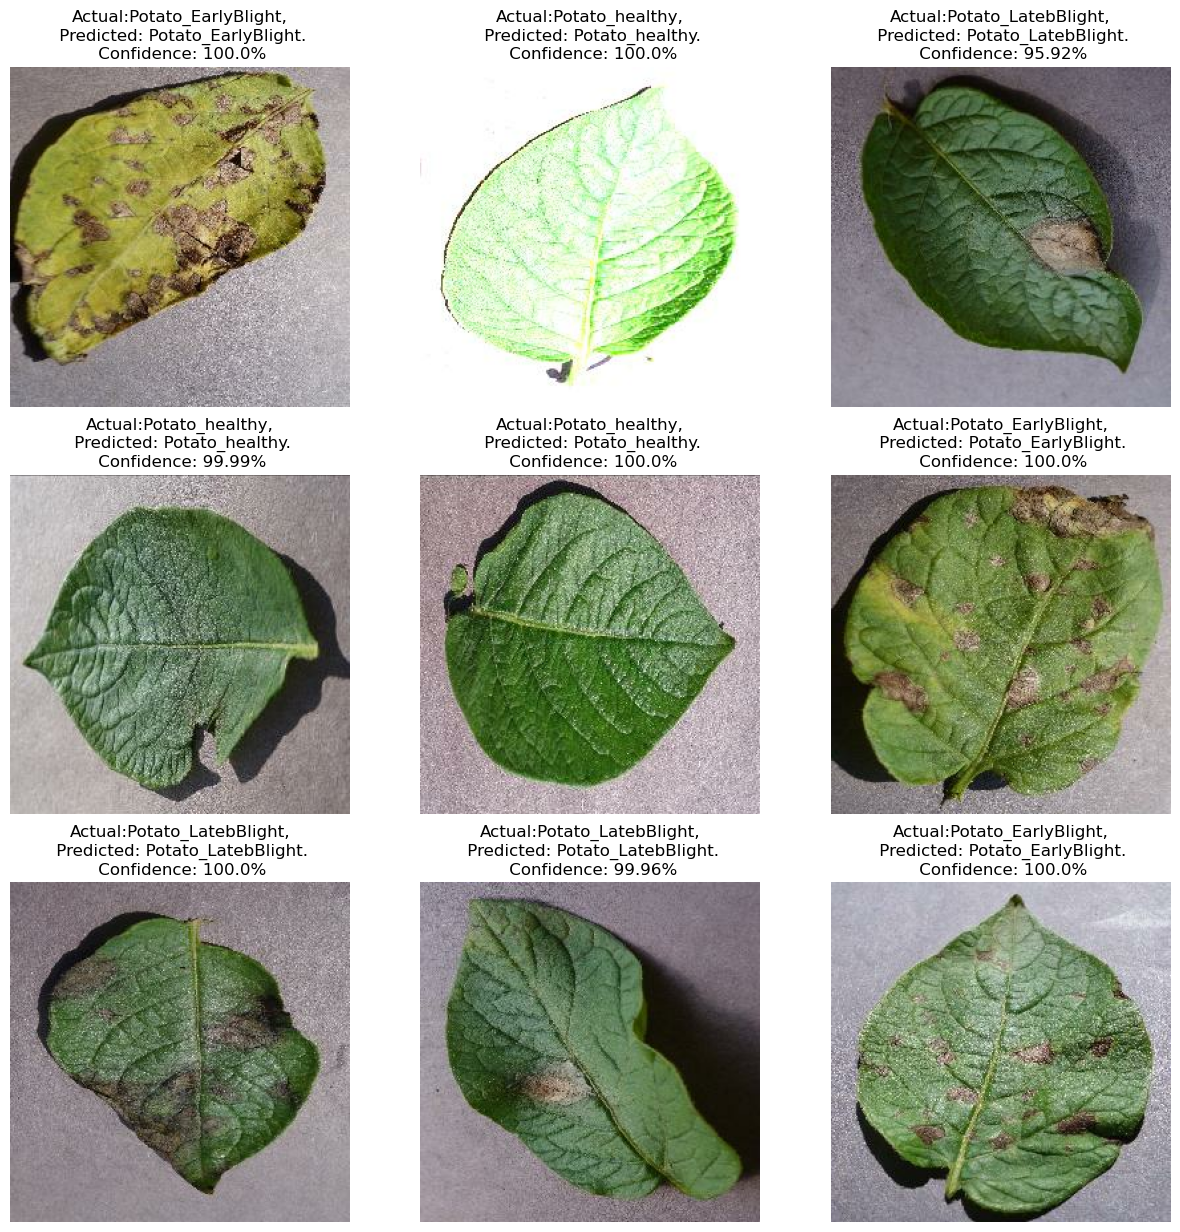

In [91]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [94]:
model_version = 1
model.save(f"C:\\Users\\SOC\\Prj_202\\model{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\SOC\Prj_202\model1.